<a href="https://colab.research.google.com/github/raghumriyer/colab/blob/master/Visualize_CIFAR10_classification_using_GradCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import os, sys
from keras.models import load_model
import cv2
import sys
from matplotlib import pyplot as plt

In [96]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
model = load_model('/content/drive/My Drive/Cifar10/cifar10_ResNet20v1_model.158.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def createHeatmap(imgs):
    preds = model.predict(imgs)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("conv2d_21")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([imgs])
    for i in range(32):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    maxx = np.max(heatmap)
    heatmap /= np.max(heatmap)
    
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return superimposed_img

coupe_s_000950.png original Image


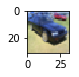

Heatmap Image


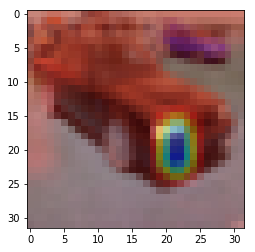

bird_s_001836.png original Image


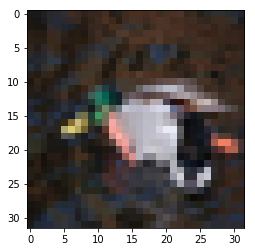

Heatmap Image


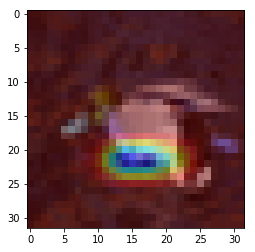

airbus_s_001549.png original Image


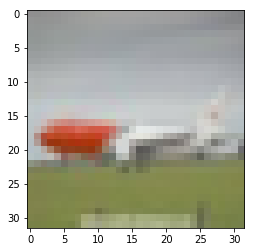

Heatmap Image


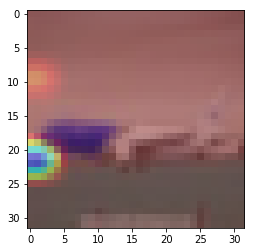

jetliner_s_000222.png original Image


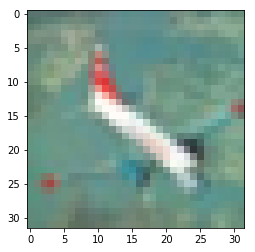

Heatmap Image


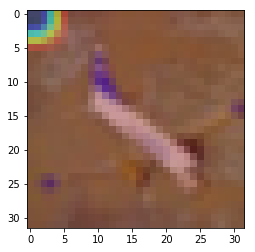

bird_of_passage_s_000748.png original Image


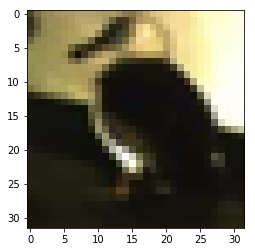

Heatmap Image


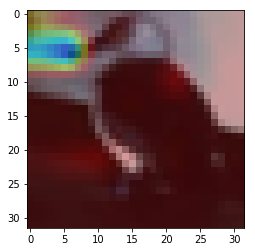

airliner_s_001715.png original Image


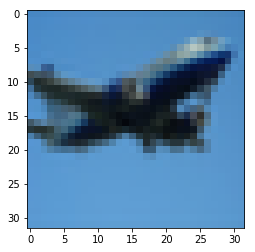

Heatmap Image


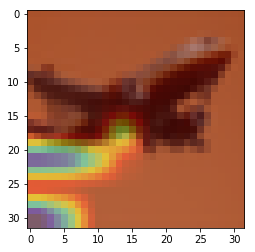

barking_deer_s_000865.png original Image


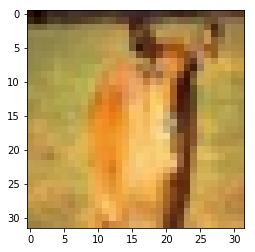

Heatmap Image


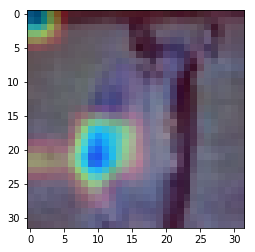

domestic_cat_s_001342.png original Image


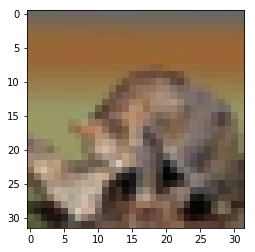

Heatmap Image


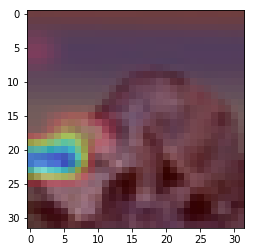

bird_of_passage_s_000603.png original Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


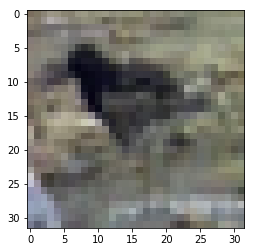

Heatmap Image


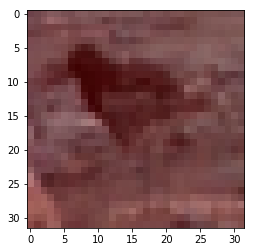

bird_s_001722.png original Image


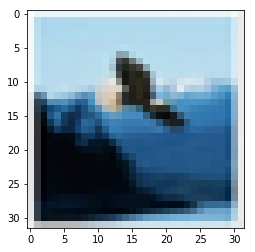

Heatmap Image


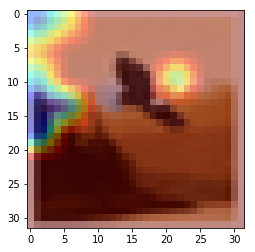

alauda_arvensis_s_001000.png original Image


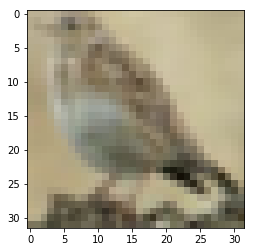

Heatmap Image


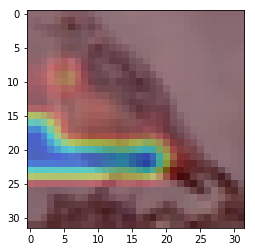

domestic_cat_s_001965.png original Image


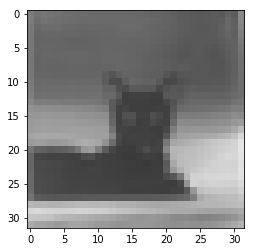

Heatmap Image


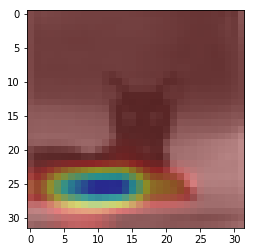

floatplane_s_000287.png original Image


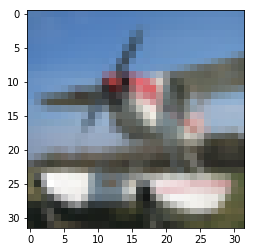

Heatmap Image


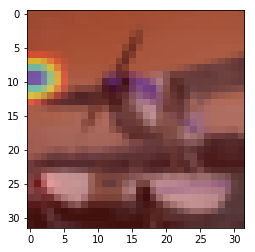

delivery_van_s_000066.png original Image


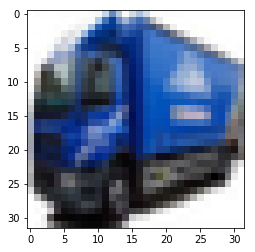

Heatmap Image


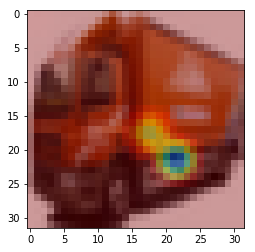

crapaud_s_000586.png original Image


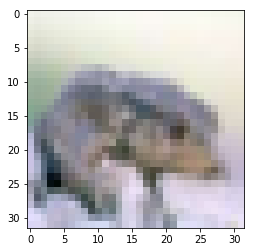

Heatmap Image


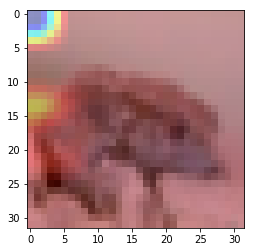

felis_domesticus_s_000589.png original Image


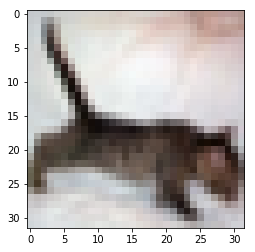

Heatmap Image


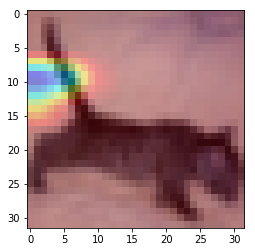

finch_s_000038.png original Image


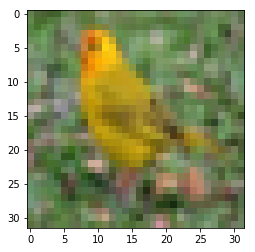

Heatmap Image


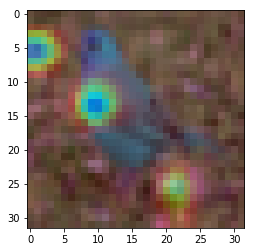

cargo_vessel_s_002150.png original Image


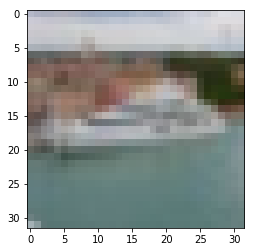

Heatmap Image


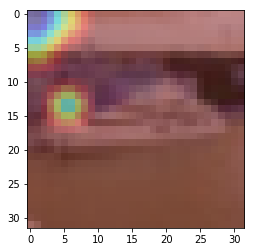

american_toad_s_000295.png original Image


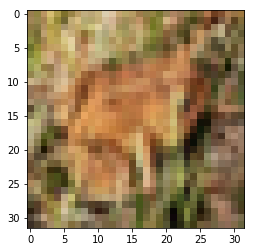

Heatmap Image


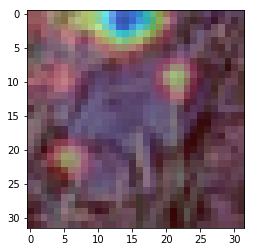

bomber_s_000138.png original Image


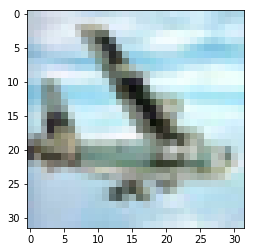

Heatmap Image


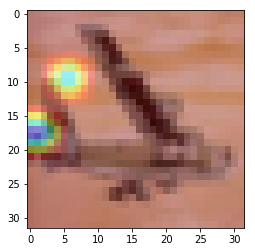

bullfrog_s_001206.png original Image


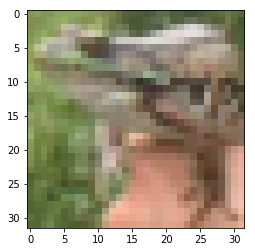

Heatmap Image


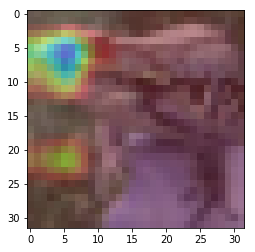

japanese_deer_s_000036.png original Image


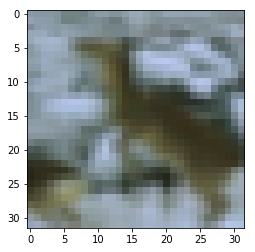

Heatmap Image


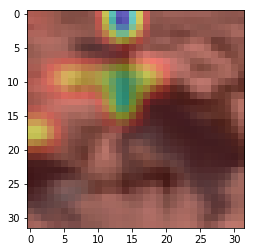

cassowary_s_000787.png original Image


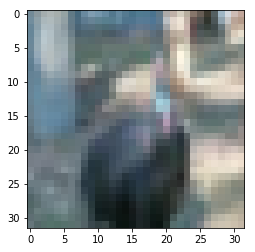

Heatmap Image


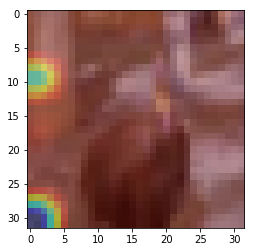

american_toad_s_001261.png original Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


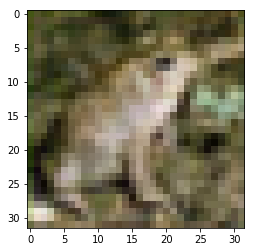

Heatmap Image


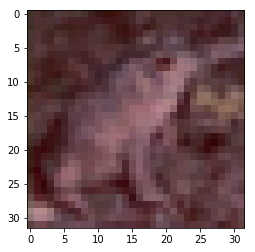

chihuahua_s_000001.png original Image


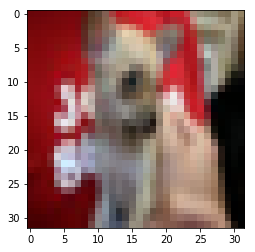

Heatmap Image


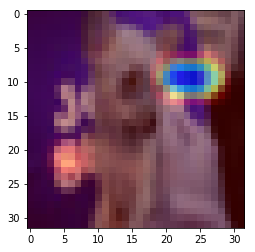

emu_s_000692.png original Image


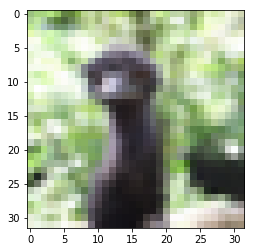

Heatmap Image


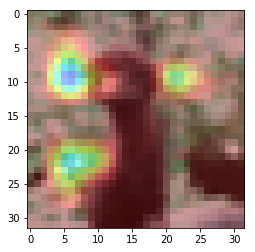

bufo_viridis_s_001409.png original Image


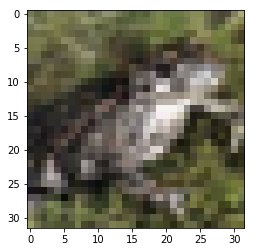

Heatmap Image


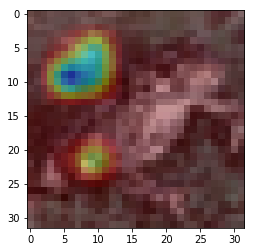

arabian_s_000001.png original Image


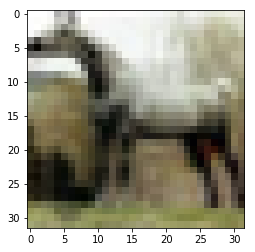

Heatmap Image


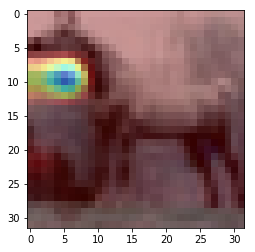

compact_car_s_001043.png original Image


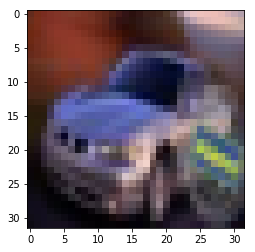

Heatmap Image


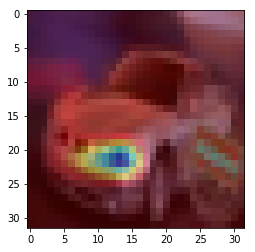

bird_s_002321.png original Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


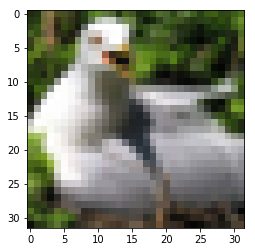

Heatmap Image


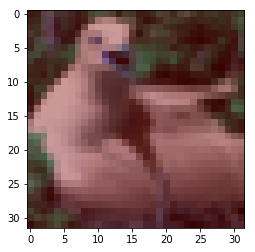

container_ship_s_000698.png original Image


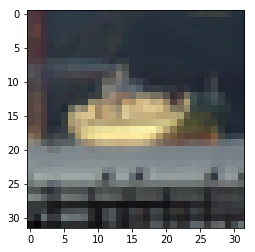

Heatmap Image


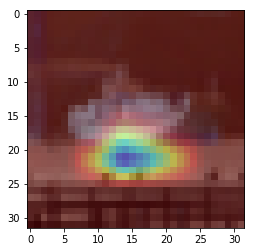

elk_s_001381.png original Image


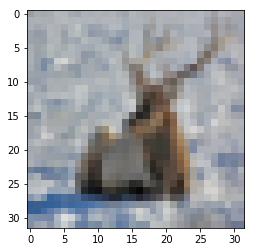

Heatmap Image


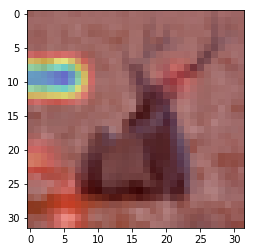

domestic_cat_s_001275.png original Image


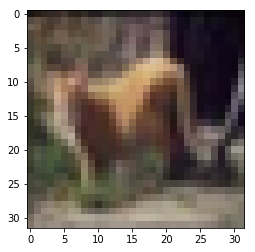

Heatmap Image


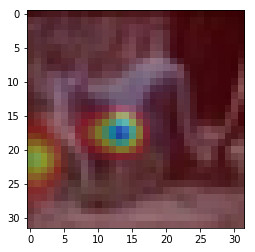

bufo_s_001722.png original Image


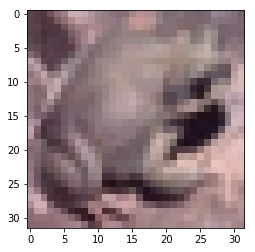

Heatmap Image


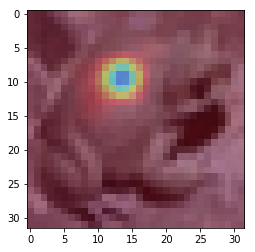

automobile_s_002597.png original Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


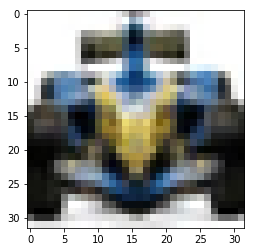

Heatmap Image


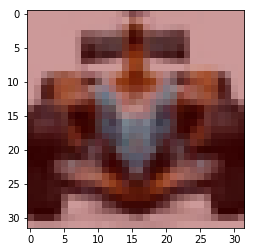

jumbo_jet_s_000033.png original Image


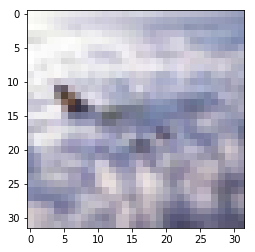

Heatmap Image


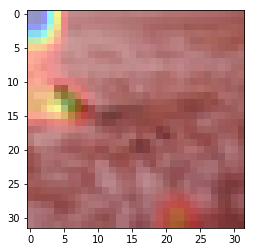

delivery_truck_s_000510.png original Image


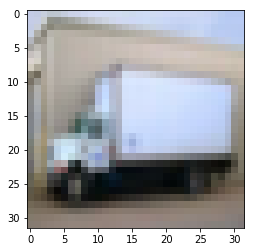

Heatmap Image


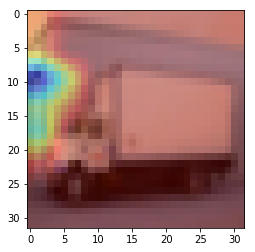

deer_s_000231.png original Image


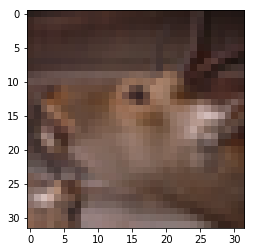

Heatmap Image


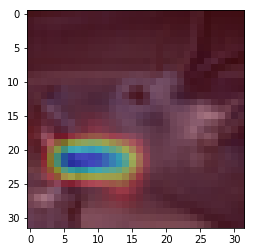

coupe_s_001319.png original Image


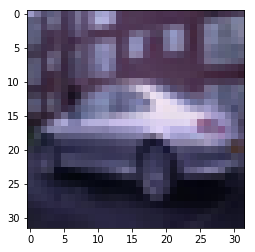

Heatmap Image


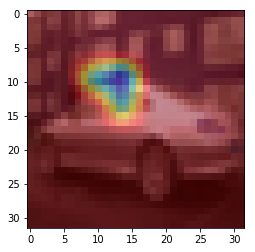

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


biplane_s_000685.png original Image


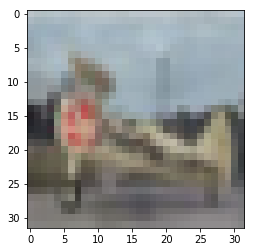

Heatmap Image


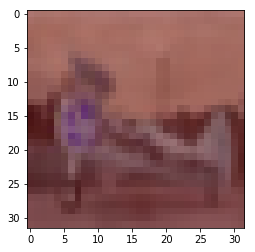

felis_domesticus_s_000028.png original Image


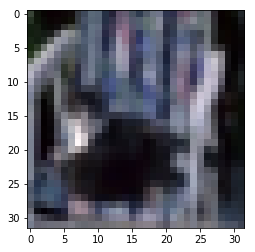

Heatmap Image


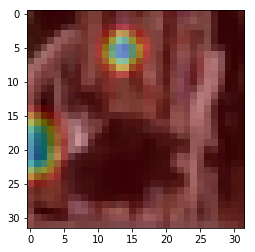

estate_car_s_000109.png original Image


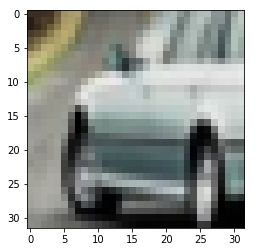

Heatmap Image


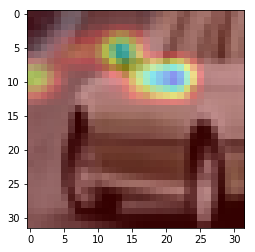

chihuahua_s_000285.png original Image


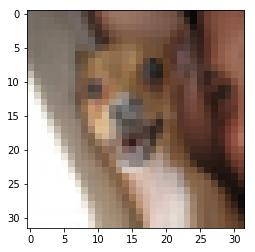

Heatmap Image


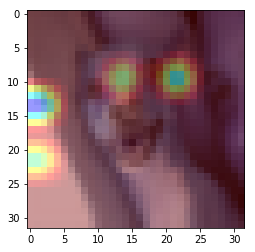

convertible_s_001150.png original Image


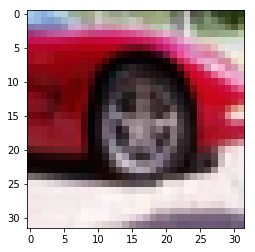

Heatmap Image


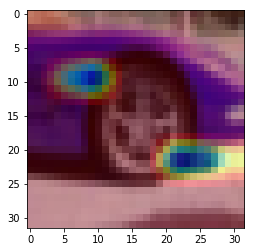

dump_truck_s_001977.png original Image


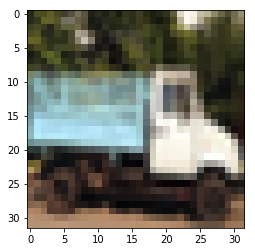

Heatmap Image


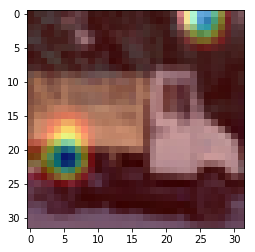

gelding_s_001030.png original Image


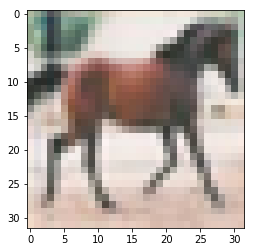

Heatmap Image


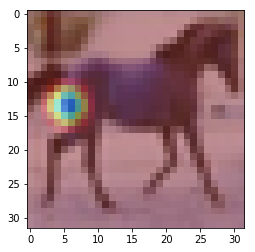

cabin_cruiser_s_001046.png original Image


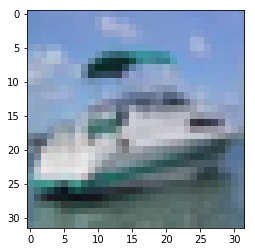

Heatmap Image


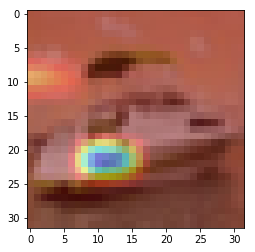

attack_aircraft_s_000578.png original Image


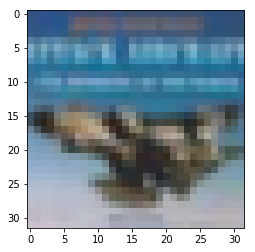

Heatmap Image


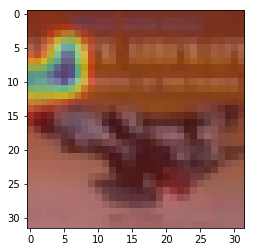

house_cat_s_001982.png original Image


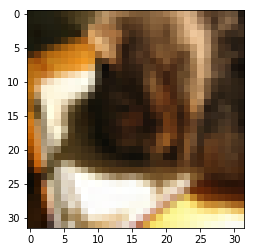

Heatmap Image


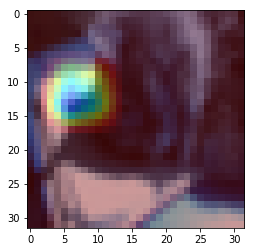

jumbo_jet_s_000220.png original Image


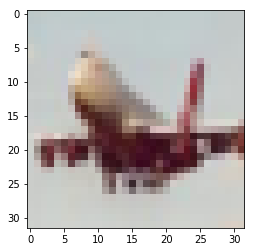

Heatmap Image


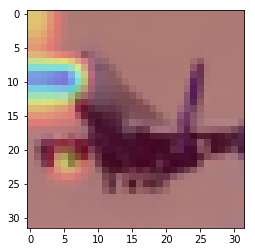

wagon_s_002201.png original Image


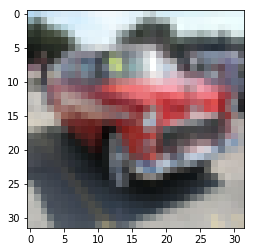

Heatmap Image


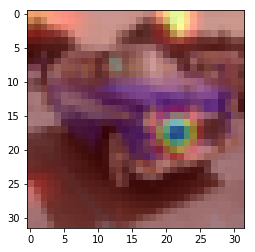

twinjet_s_000949.png original Image


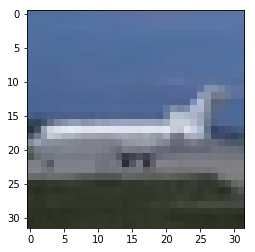

Heatmap Image


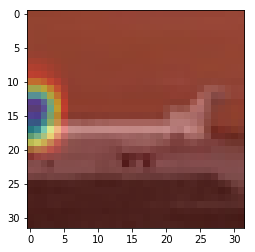

tractor_trailer_s_001415.png original Image


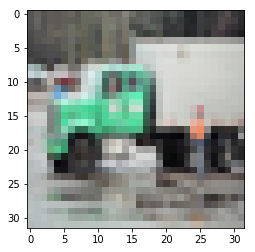

Heatmap Image


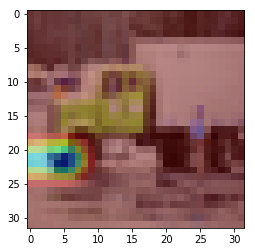

truck_s_002309.png original Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


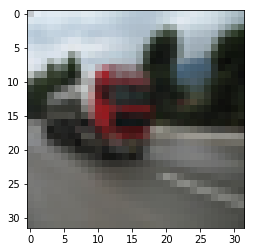

Heatmap Image


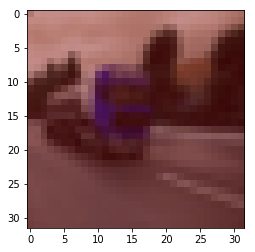

In [98]:
image_folder = '/content/drive/My Drive/EIP3/img'

img_list = os.listdir(image_folder)

w=32
h=32
fig=plt.figure(figsize=(25, 25))
columns = 2
rows = len(img_list)/2
i = 1

for imgt in img_list:    
    img_path = os.path.join(image_folder, imgt)    
    imgr = image.load_img(img_path)
    img = image.img_to_array(imgr)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    heatmap = createHeatmap(img)
    fig.add_subplot(rows, columns, i)
    i = i+1
    print (imgt + " original Image")
    plt.imshow(imgr)
    plt.show()
    print ("Heatmap Image")
    plt.imshow(heatmap)
    plt.show()